# Data Analysis tutorial: Part4 - Model Development

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('imports3.csv')
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-mpg,price,price-binned,fuel-type_diesel,fuel-type_gas
0,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,0.413433,...,2.68,9.0,111.0,5000.0,11.190476,27,13495,Low,0,1
1,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,0.413433,...,2.68,9.0,111.0,5000.0,11.190476,27,16500,Low,0,1
2,1,122.0,alfa-romero,std,two,hatchback,rwd,front,94.5,0.449254,...,3.47,9.0,154.0,5000.0,12.368421,26,16500,Low,0,1
3,2,164.0,audi,std,four,sedan,fwd,front,99.8,0.529851,...,3.40,10.0,102.0,5500.0,9.791667,30,13950,Low,0,1
4,2,164.0,audi,std,four,sedan,4wd,front,99.4,0.529851,...,3.40,8.0,115.0,5500.0,13.055556,22,17450,Low,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,std,four,sedan,rwd,front,109.1,0.711940,...,3.15,9.5,114.0,5400.0,10.217391,28,16845,Low,0,1
197,-1,95.0,volvo,turbo,four,sedan,rwd,front,109.1,0.711940,...,3.15,8.7,160.0,5300.0,12.368421,25,19045,Medium,0,1
198,-1,95.0,volvo,std,four,sedan,rwd,front,109.1,0.711940,...,2.87,8.8,134.0,5500.0,13.055556,23,21485,Medium,0,1
199,-1,95.0,volvo,turbo,four,sedan,rwd,front,109.1,0.711940,...,3.40,23.0,106.0,4800.0,9.038462,27,22470,Medium,1,0


## Linear Regression

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
lm = LinearRegression()

In [5]:
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X,Y)

LinearRegression()

In [6]:
Yhat = lm.predict(X)
lm.score(X,Y)

0.4965911884339175

### Y = b1X+b0

In [7]:
lm.intercept_       # b0

38423.305858157386

In [8]:
lm.coef_          # b1

array([-821.73337832])

#### price = 38423.3 - 821.7 * highway-mpg

In [9]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z, Y)
Yhat2 = lm.predict(Z)

In [10]:
lm.intercept_, lm.coef_

(-15824.038208234477,
 array([53.61042729,  4.70886444, 81.47225667, 36.39637823]))

In [11]:
lm.score(Z,Y)

0.8094130135602673

## model evaluation with visualization

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

(0.0, 48182.31223570857)

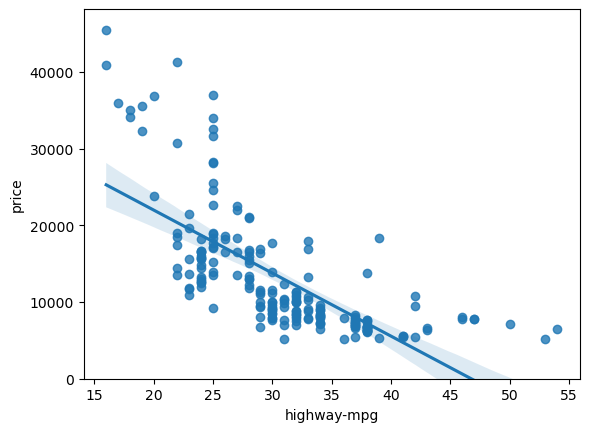

In [13]:
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

#### Residual plot

<Axes: xlabel='highway-mpg', ylabel='price'>

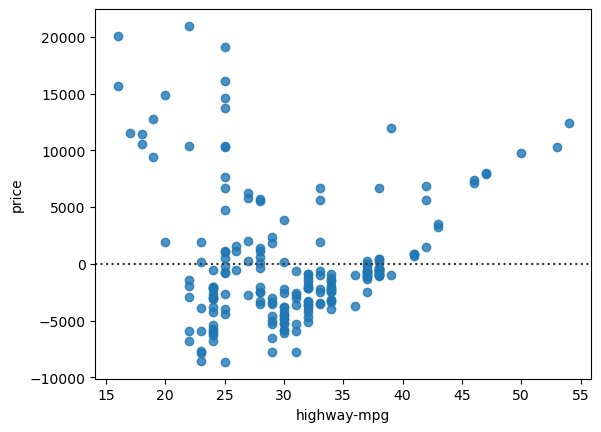

In [14]:
sns.residplot(x="highway-mpg", y="price", data=df)

#### Distribution plots

C:\Users\sajad\AppData\Local\Temp\ipykernel_13380\1215780493.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  axl = sns.distplot(df['price'], hist=False, color='r', label="Actual Value")
C:\Users\sajad\AppData\Local\Temp\ipykernel_13380\1215780493.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s

<Axes: xlabel='price', ylabel='Density'>

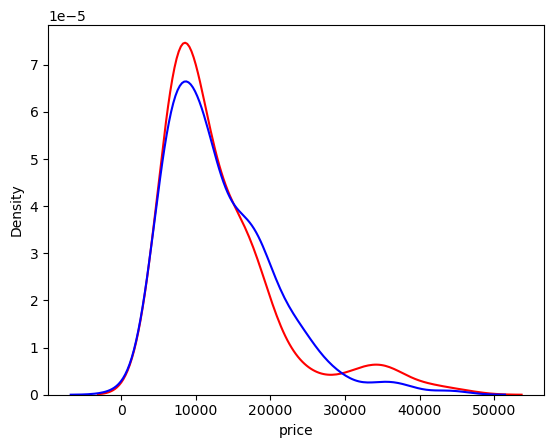

In [15]:
axl = sns.distplot(df['price'], hist=False, color='r', label="Actual Value")
sns.distplot(Yhat2, hist=False, color='b', label="Fitted Values", ax=axl)

### Polynomial Regression and pipelines

In [16]:
xp = df['highway-mpg']
yp = df['price']
f = np.polyfit(xp,yp,3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


In [17]:
from sklearn.preprocessing import PolynomialFeatures

In [18]:
pr = PolynomialFeatures(degree=2, include_bias=False)
x_polly = pr.fit_transform(df[['horsepower', 'curb-weight']])

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
scaler.fit(df[['horsepower', 'curb-weight']])

StandardScaler()

In [21]:
x_scale = scaler.transform(df[['horsepower', 'curb-weight']])

In [22]:
from sklearn.pipeline import Pipeline

In [29]:
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2)), ('mode', LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], df['price'])
Yhat3 = pipe.predict(df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

C:\Users\sajad\AppData\Local\Temp\ipykernel_13380\4184826349.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  axl = sns.distplot(df['price'], hist=False, color='r', label="Actual Value")
C:\Users\sajad\AppData\Local\Temp\ipykernel_13380\4184826349.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s

<Axes: xlabel='price', ylabel='Density'>

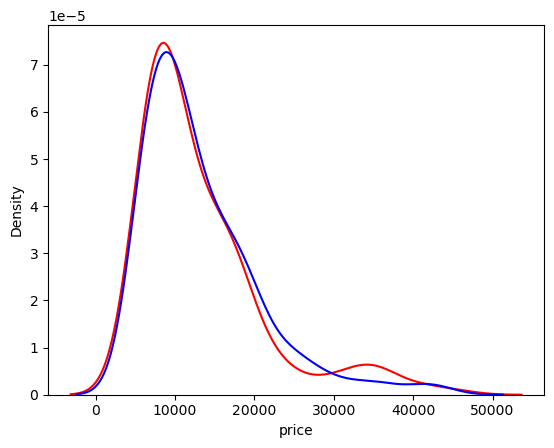

In [30]:
axl = sns.distplot(df['price'], hist=False, color='r', label="Actual Value")
sns.distplot(Yhat3, hist=False, color='b', label="Fitted Values", ax=axl)

### Measures for in-sample evaluation
#### MSE

In [31]:
from sklearn.metrics import mean_squared_error

In [35]:
mean_squared_error(df['price'], Yhat3)

9655770.595172966

#### R2_Score

In [37]:
pipe.score(df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], df['price'])

0.8463476086131143

### Prediction and Decision Making

In [50]:
lm = LinearRegression()
lm.fit(df[['highway-mpg']], df['price'])
lm.predict(np.array(30.0).reshape(-1,1))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13771.3045085])

In [51]:
new_i = np.arange(1,101,1).reshape(-1,1)
lm.predict(new_i)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 37601.57247984,  36779.83910151,  35958.10572319,  35136.37234487,
        34314.63896655,  33492.90558823,  32671.1722099 ,  31849.43883158,
        31027.70545326,  30205.97207494,  29384.23869662,  28562.50531829,
        27740.77193997,  26919.03856165,  26097.30518333,  25275.57180501,
        24453.83842668,  23632.10504836,  22810.37167004,  21988.63829172,
        21166.9049134 ,  20345.17153508,  19523.43815675,  18701.70477843,
        17879.97140011,  17058.23802179,  16236.50464347,  15414.77126514,
        14593.03788682,  13771.3045085 ,  12949.57113018,  12127.83775186,
        11306.10437353,  10484.37099521,   9662.63761689,   8840.90423857,
         8019.17086025,   7197.43748192,   6375.7041036 ,   5553.97072528,
         4732.23734696,   3910.50396864,   3088.77059031,   2267.03721199,
         1445.30383367,    623.57045535,   -198.16292297,  -1019.8963013 ,
        -1841.62967962,  -2663.36305794,  -3485.09643626,  -4306.82981458,
        -5128.5631929 ,  

#### Negative price values shows the incorrect model of highway mpg